# 課題とゴール

来週授業前までにSlackチャンネル(全体or個人)提出してください。<br>
宿題ではScikit-learn付属の乳がんデータセットを扱っていただきます。<br>
問題としては、分類なのでiris_dataと殆ど変わりません。<br>
irisは3クラス分類、乳がんデータセットは2値分類という点です。<br>
irisのjupyter notebookのファイルを見て自力で頑張ってみてください。<br>
この**課題のゴールは、正解率などを算出し、このケースではどの評価指標を重視すべきかを考えることを課題のゴールとします。**

In [2]:
#データセットの読み込み
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## 【問題1】 dirを用いてデータセットの確認

In [3]:
dir(cancer
)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

## 【問題2 】データの説明(DESCR)

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 【問題3】説明変数のデータの中身

In [6]:
print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [11]:
cancer.data.shape

(569, 30)

## 【問題4 】説明変数の名称

In [7]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## 【問題5】 目的変数のデータの中身

In [12]:
# .targetを利用
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [13]:
# .shapeを利用
cancer.target.shape

(569,)

In [14]:
# .target_names
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

#### scikit-learnでは{Negative:0,Positive:1}と決められています。今回のタスクでは、ガンである(悪性の)人を見つけることが目的です。目的のものをPositiveと置いておくと評価の際に便利ですので1と0の値を入れ替えます。

In [15]:
#yのクラス(0,1)の入れ替え
X = cancer.data
y = 1- cancer.target
# 0 : benign(良性)
# 1 : malignant(悪性)

## 【問題6 】ホールドアウト法を用いてデータを分割

#### 説明変数(X)を訓練用(X_train)とテスト用(X_test)に分けている。
#### 目的変数(y)を訓練用(y_train)とテスト用(y_test)に分けている。

## 【問題6】分割したデータの形状を確認

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer.data, y, test_size = 0.25, random_state=5)

In [20]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

426
143
426
143


In [22]:
print(y_test)

[1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1
 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]


## 【問題7】ロジスティック回帰の定義

In [26]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

## 【問題8】  訓練データを用いて学習
####それぞれ訓練用の説明変数と目的変数を使う

In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## 【問題9】 学習済みモデルを使って、テスト用の説明変数から予測

In [28]:
pred = model.predict(x_test)
pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [30]:
x_test[0]

array([1.530e+01, 2.527e+01, 1.024e+02, 7.324e+02, 1.082e-01, 1.697e-01,
       1.683e-01, 8.751e-02, 1.926e-01, 6.540e-02, 4.390e-01, 1.012e+00,
       3.498e+00, 4.350e+01, 5.233e-03, 3.057e-02, 3.576e-02, 1.083e-02,
       1.768e-02, 2.967e-03, 2.027e+01, 3.671e+01, 1.493e+02, 1.269e+03,
       1.641e-01, 6.110e-01, 6.335e-01, 2.024e-01, 4.027e-01, 9.876e-02])

## 【問題10】 X_testの実際の値(答え)の出力

In [32]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

## 【問題11】 混同行列の表示

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
accuracy_score(y_test, pred)

0.958041958041958

In [36]:
cm = confusion_matrix(y_test, pred)

In [37]:
cm

array([[86,  2],
       [ 4, 51]])

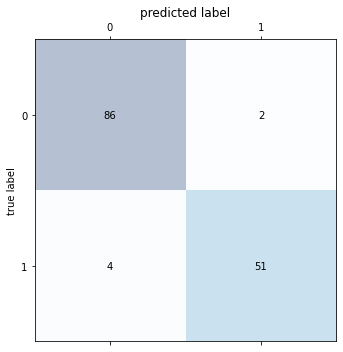

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.title('predicted label')
plt.ylabel('true label')
plt.tight_layout() # ラベルが重ならないように自動調整
plt.show()

In [38]:
#関数を作って正解率、適合率、再現率、F値をまとめて表示
def all_score(y_test,pred):
    print("正解率", accuracy_score(y_test,pred))
    print("適合率", precision_score(y_test,pred))
    print("再現率", recall_score(y_test,pred))
    print("F値", f1_score(y_test, pred))

In [40]:
all_score(y_test, pred)

正解率 0.958041958041958
適合率 0.9622641509433962
再現率 0.9272727272727272
F値 0.9444444444444444


## 【問題12】  どの評価指標を使うのが良いかを記載。
#### 課題のゴールは、正解率などを算出し、このケースではどの評価指標を重視すべきかを考えることを課題のゴールとします。

##### ここにレポーティングしてください。

評価指標として重視すべきなのは再現率
#### レポーティング項目事項
・モデルの総合的な評価に関して<br>92%の精度が出ておりこのモデルの精度は高いと言える
  
・過学習に関して<br>
　　
  
・モデルを評価した指標としてなぜそれを選んだのか<br>癌などの病気の診断では、誤って陰性のものを陽性（FP）と推定してしまうことよりも、陽性であるものを見逃してしまうことがあってはならないため、再現率を適用した。